# Assignment Details:

Task: Build a Python-based machine learning model that demonstrates the following functionalities:
Data Processing: Use a provided sample dataset (CSV format) representing user activity, such as task completion times, app usage, or wellness metrics.
Feature Engineering: Clean and preprocess the dataset to extract useful insights.
Model Development: Build a classification or regression model to predict user task completion likelihood based on activity patterns.
Model Evaluation: Evaluate the model using appropriate metrics (accuracy, precision, recall).
Output: Generate predictions for a few sample user inputs and present the results.


# Dataset Chosen - Sleep Health and Lifestyle

To carry out this assignment, I chose the Sleep Health and Lifestyle Dataset, available on Kaggle at the following link: [Sleep-health-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset). I will use the column "Sleep Disorder" as the target, aiming to predict potential sleep irregularities in individuals based on other health indicators.


![](https://images.squarespace-cdn.com/content/v1/54bf12d2e4b0f0d81bf74ee7/1650333394004-7TZFBMRLBJEQFID9UNRT/Improve+sleep+quality.jpg?format=1500w)

### **Key Features**:
- **Sleep Metrics**: Sleep duration and quality.
- **Lifestyle Factors**: Physical activity levels, stress levels, and BMI categories.
- **Cardiovascular Health**: Blood pressure and heart rate measurements.
- **Sleep Disorders**: Presence of conditions like insomnia and sleep apnea.


#### The dataset contains the following columns:

* **Person ID**: An identifier for each individual.
* **Gender**: The gender of the person (Male/Female).
* **Age**: The age of the person in years.
* **Occupation**: The occupation or profession of the person.
* **Sleep Duration (hours)**: The number of hours the person sleeps per day.
* **Quality of Sleep (scale: 1-10)**: A subjective rating of sleep quality, ranging from 1 to 10.
* **Physical Activity Level (minutes/day)**: The amount of time the person dedicates to physical activity daily, in minutes.
* **Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).
* **Blood Pressure (systolic/diastolic)**: The person's blood pressure measurement, expressed as systolic pressure over diastolic pressure.
* **Heart Rate (bpm)**: The person's resting heart rate, measured in beats per minute (bpm).
* **Daily Steps**: The number of steps the person takes per day.
* **Sleep Disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


### **Research Questions**:
- What are the types of sleep-related diseases?
- What is the range of physical activity levels mins/day (minimum to maximum)?
- Does sleep quality vary by gender and BMI category?
- Which occupations experience the highest stress levels?
- Does physical activity level affect the quality of sleep?
- How does the prevalence of sleep disorders differ between genders?
- Does daily step count vary significantly across BMI categories?
- Does sleep disorder affect physical activity levels?
- How do Sleep Duration and Quality of Sleep relate to Stress Levels?
- How do Blood Pressure, Heart Rate, and Daily Steps vary across different levels of Sleep Quality?
- How does Sleep Duration and Sleep Quality vary across different age groups?
- What is the relationship between daily steps and heart rate?
- How does the Health Risk Score vary with Sleep Quality?
- How does the Stress Tolerance Index (STI), calculated as the ratio of Heart Rate to Stress Level, impact the Quality of Sleep?

# Step 1: Data Overview & Cleaning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pd.read_csv(r"C:\Users\USER PC\Desktop\New Project\Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df1 = pd.read_csv(r"C:\Users\USER PC\Desktop\New Project\Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
# Utility Functions
def univariate_analysis(cat_cols, disc_cols, df1):

    # Perform univariate analysis for categorical and discrete columns.
    # For categorical columns, it generates count plots to show the frequency of each category.
    # For discrete columns, it generates histograms with KDE (Kernel Density Estimate).

    # Parameters:
    # cat_cols : list
    #     A list of categorical column names to analyze and visualize.
    # disc_cols : list
    #     A list of discrete column names to analyze and visualize.


    # None
    #     The function generates visualizations for the provided column types and displays them.
    
    # For categorical columns
       # Set figure size dynamically based on number of charts
    total_plots = len(cat_cols) + len(disc_cols)
    rows = math.ceil(total_plots / 3)  # Adjust number of rows based on total plots
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size
    axes = axes.flatten()  # Flatten the grid into a 1D array for easy indexing
    
    plot_index = 0  # Track the subplot index
    
    # Plot categorical columns
    for col in cat_cols:
        sns.countplot(data=df1, x=col, palette='Set2', order=df1[col].value_counts().index, ax=axes[plot_index])
        axes[plot_index].set_title(f'Distribution of {col}')
        axes[plot_index].set_xlabel(col)
        axes[plot_index].set_ylabel('Count')
        axes[plot_index].tick_params(axis='x', rotation=45)
        plot_index += 1
    
    # Plot discrete columns
    for col in disc_cols:
        sns.histplot(df1[col], kde=True, bins=30, color='green', ax=axes[plot_index])
        axes[plot_index].set_title(f'Distribution of {col}')
        axes[plot_index].set_xlabel(col)
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1
    
    # Hide any unused subplots (if any)
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [6]:
# Check data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
# Check basic data summary for textual variables
df1.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [8]:
# Check basic data summary for numeric variables
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [9]:
df1.columns = df1.columns.str.strip()

In [10]:
#Drop redundant column
#df1.drop(columns=['Person ID'], inplace=True)
# Transform BMI column
#df1['BMI Category'] = df1['BMI Category'].replace("Normal Weight", "Normal")

In [11]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [12]:
# Check number of numerical columns, textual columns, categorical columns, and discrete columns.
num_cols = [i for i in df1.columns if df1[i].dtype in ['int64', 'float64']]
text_cols = [i for i in df1.columns if df1[i].dtype =='object']
cat_cols = [i for i in df1.columns if len(df1[i].unique()) <= 10]
disc_cols = [i for i in df1.columns if len(df1[i].unique()) > 10]
print("Numerical Columns: ", num_cols)
print("Textual Columns: ", text_cols)
print("Categorical Columns: ", cat_cols)
print("Discrete Columns: ", disc_cols)

Numerical Columns:  ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Textual Columns:  ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
Categorical Columns:  ['Gender', 'Quality of Sleep', 'Stress Level', 'BMI Category', 'Sleep Disorder']
Discrete Columns:  ['Person ID', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']


In [13]:
# Check null values
df1.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [14]:
# In Sleep Disorder column, 219 Nan are present, we cannot drop it since there are only 374 rows. We will replace it by "No Disorder".
df1['Sleep Disorder'].fillna('No Disorder', inplace=True)

In [15]:
# Check null values again
df1.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## EDA (Exploratory Data Analysis)

# Step 2: Univariate Analysis

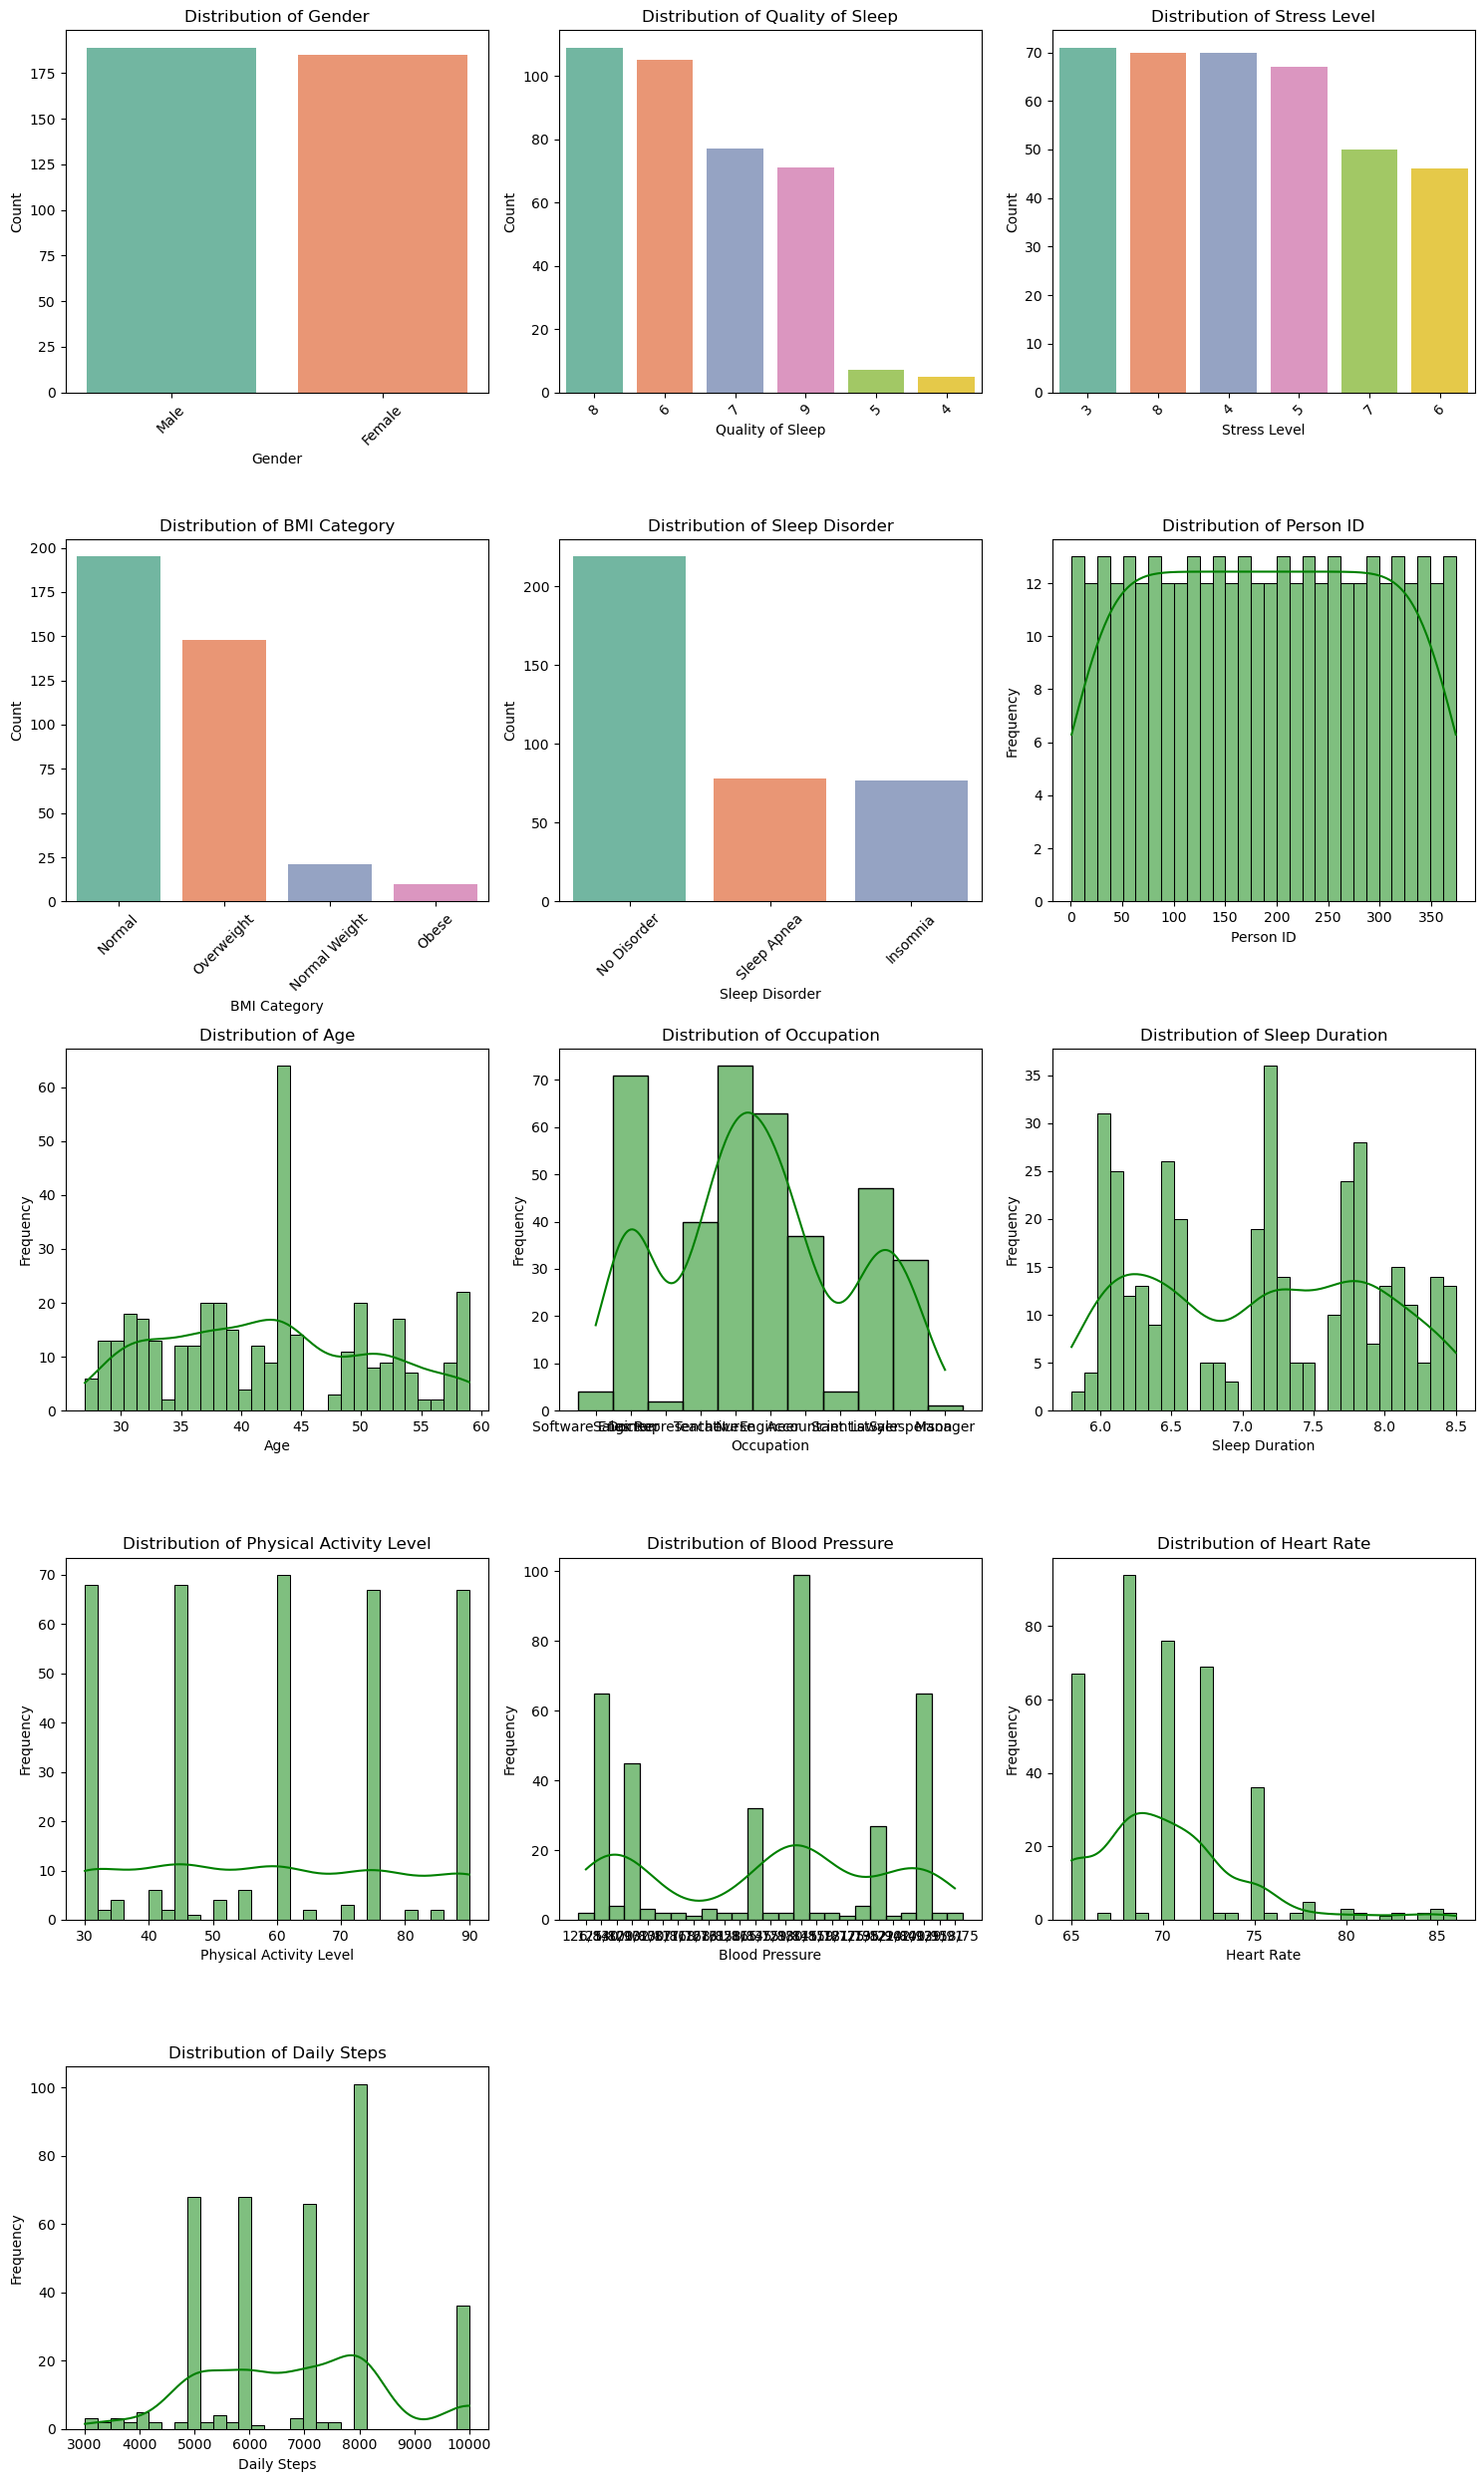

In [16]:
univariate_analysis(cat_cols, disc_cols, df1)

# Step 3: Multivariate Analysis

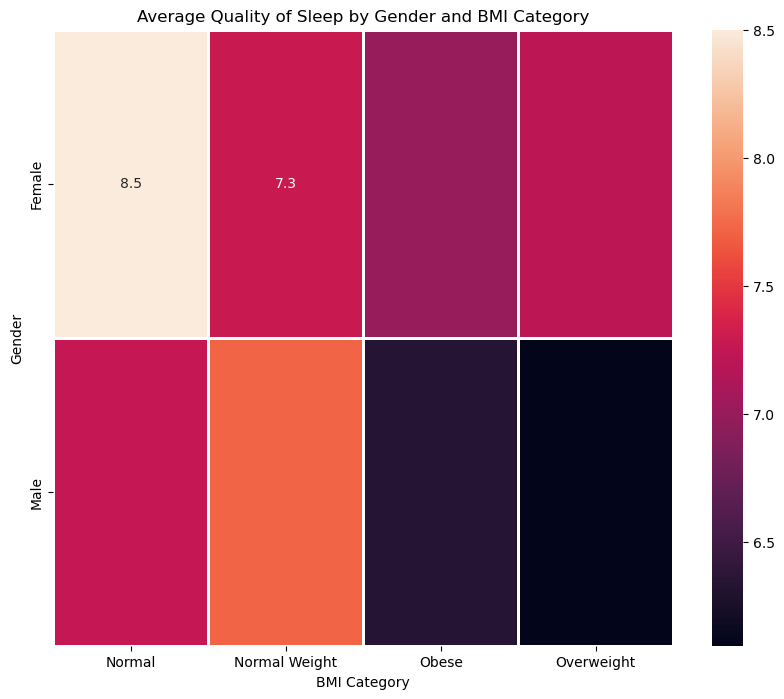

In [17]:
# Multivariate analysis
# Q: Does sleep quality vary by gender and BMI category?
plt.figure(figsize=(10, 8))
heatmap = df1.pivot_table(values='Quality of Sleep', index='Gender', columns='BMI Category', aggfunc='mean')
sns.heatmap(heatmap, annot=True, fmt=".1f", linewidth=1)
plt.title("Average Quality of Sleep by Gender and BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Gender")
plt.show()

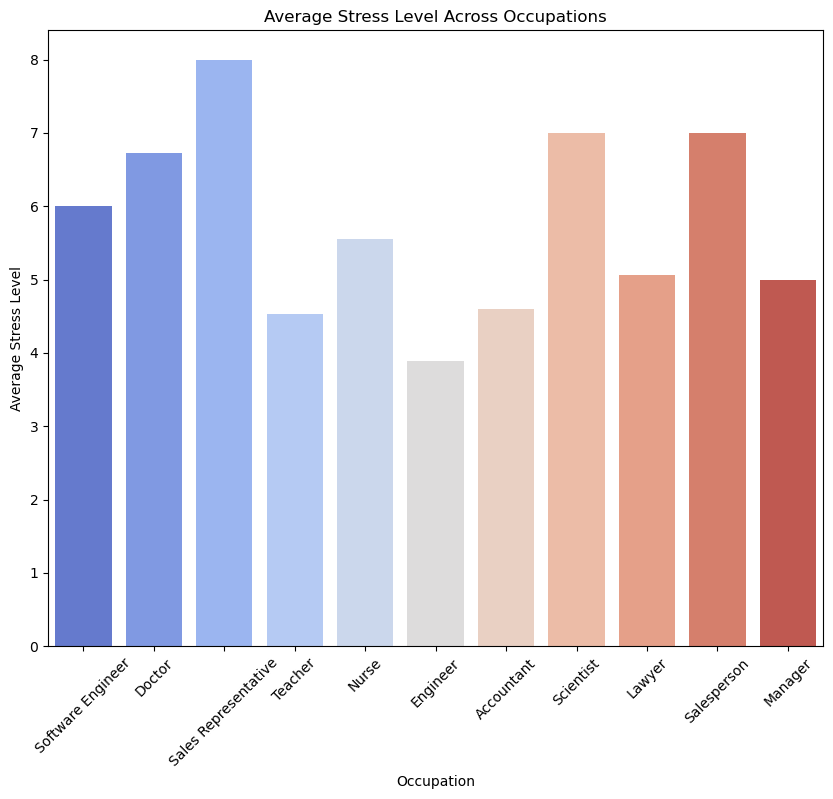

In [18]:
# Q: Which occupations experience the highest stress levels?
plt.figure(figsize=(10, 8))
sns.barplot(data=df1, x="Occupation", y="Stress Level", palette="coolwarm", ci=None)
plt.title("Average Stress Level Across Occupations")
plt.xlabel("Occupation")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=45)
plt.show()

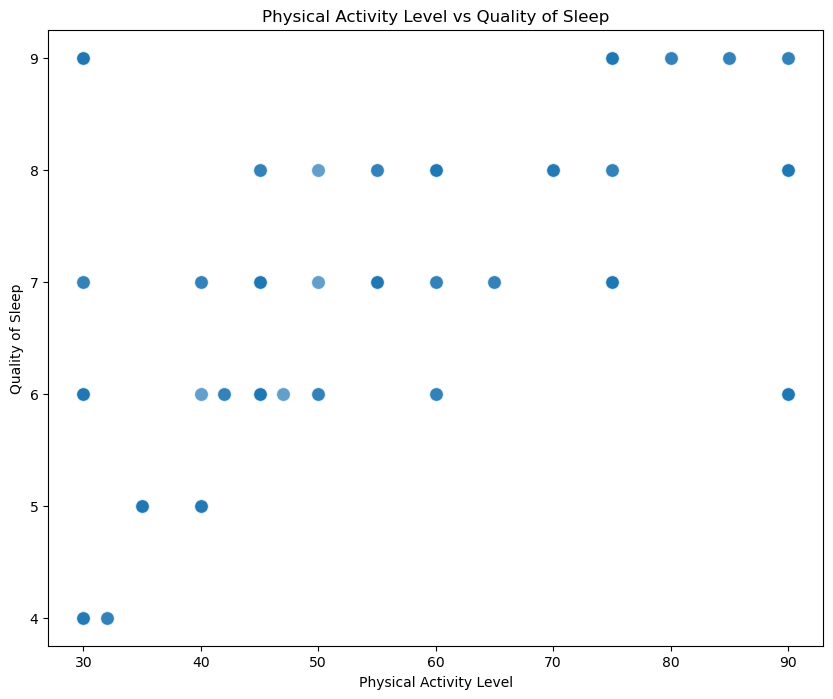

In [19]:
# Q: Does physical activity level affect the quality of sleep?
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x="Physical Activity Level", y="Quality of Sleep", s=100, alpha=0.7)
plt.title("Physical Activity Level vs Quality of Sleep")
plt.xlabel("Physical Activity Level")
plt.ylabel("Quality of Sleep")
plt.show()

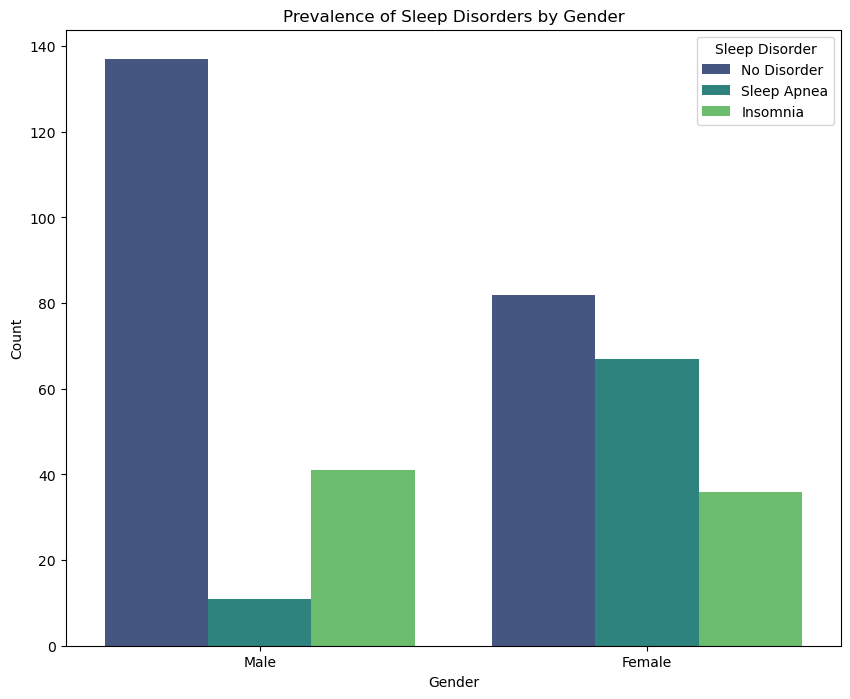

In [20]:
# Q: How does the prevalence of sleep disorders differ between genders?
plt.figure(figsize=(10, 8))
sns.countplot(data=df1, x="Gender", hue="Sleep Disorder", palette="viridis")
plt.title("Prevalence of Sleep Disorders by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Sleep Disorder")
plt.show()

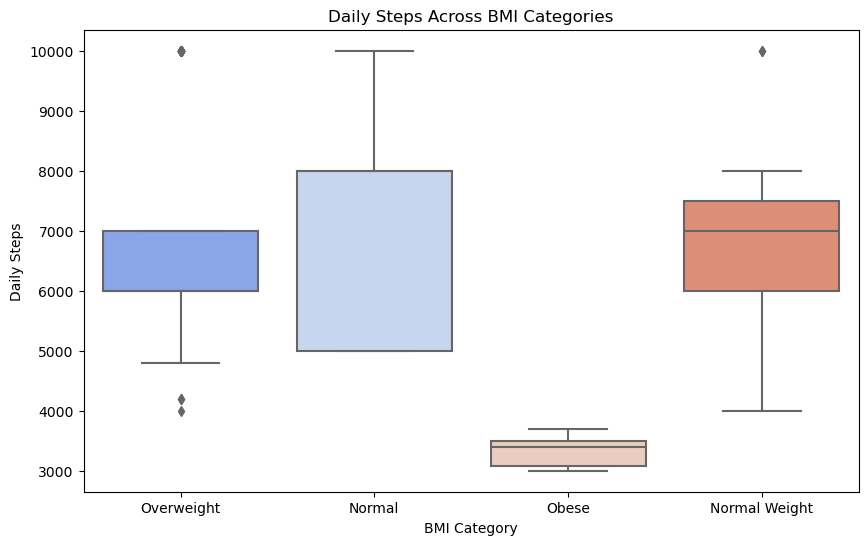

In [21]:
# Q: Does daily step count vary significantly across BMI categories?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x="BMI Category", y="Daily Steps", palette="coolwarm")
plt.title("Daily Steps Across BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Daily Steps")
plt.show()

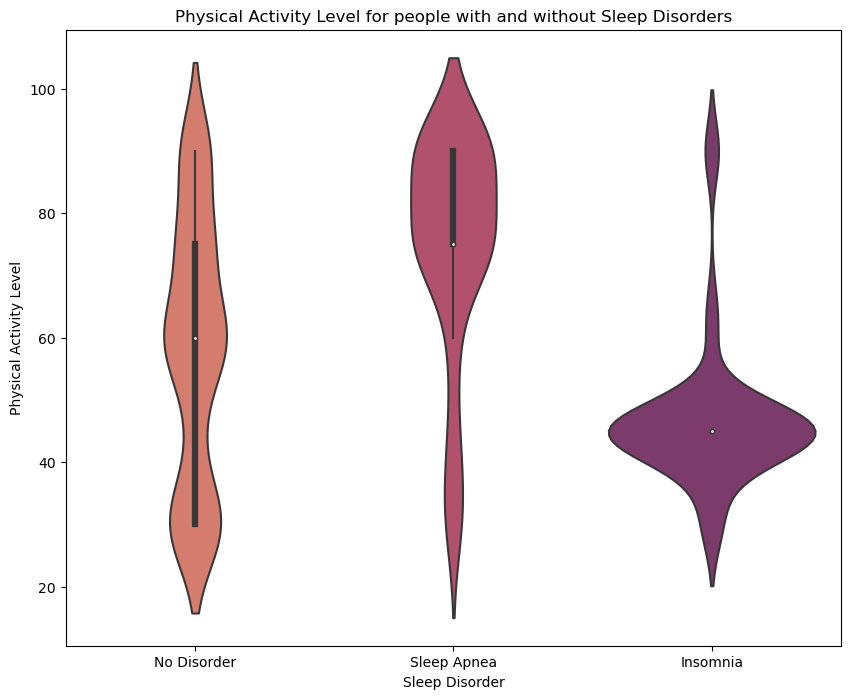

In [22]:
# Q: Does sleep disorder affect physical activity levels?
plt.figure(figsize=(10, 8))
sns.violinplot(data=df1, x="Sleep Disorder", y="Physical Activity Level", palette="flare")
plt.title("Physical Activity Level for people with and without Sleep Disorders")
plt.xlabel("Sleep Disorder")
plt.ylabel("Physical Activity Level")
plt.show()

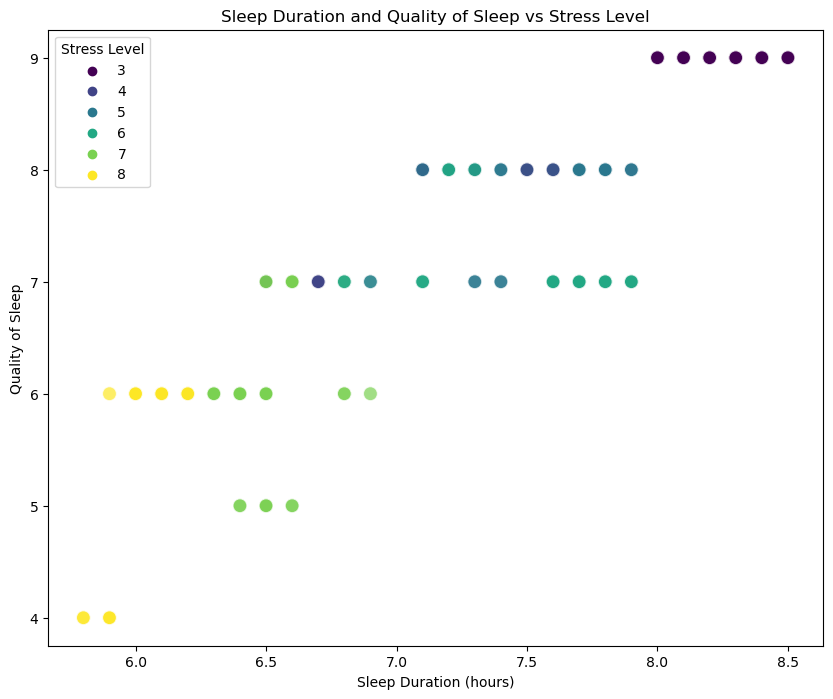

In [23]:
# Q: How do Sleep Duration and Quality of Sleep relate to Stress Levels?
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x="Sleep Duration", y="Quality of Sleep", hue="Stress Level", palette="viridis", s=100, alpha=0.7)
plt.title("Sleep Duration and Quality of Sleep vs Stress Level")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Quality of Sleep")
plt.legend(title="Stress Level")
plt.show()

In [24]:
# Q: How do Blood Pressure, Heart Rate, and Daily Steps vary across different levels of Sleep Quality?
# 'Blood Pressure' is in the format 'Systolic/Diastolic', we will first extract systolic blood pressure for analysis
df1['Systolic BP'] = df1['Blood Pressure'].str.split('/').str[0].astype(int)
df1['Diastolic BP'] = df1['Blood Pressure'].str.split('/').str[1].astype(int)

table = df1.groupby('Quality of Sleep')[['Systolic BP', 'Diastolic BP', 'Heart Rate', 'Daily Steps']].mean()
table


,Systolic BP,Diastolic BP,Heart Rate,Daily Steps
Quality of Sleep,,,,
4,136.400000,88.400000,83.400000,3880.000000
5,130.571429,85.857143,77.714286,4257.142857
6,131.047619,86.400000,73.209524,7092.380952
7,127.701299,84.753247,69.415584,6659.740260
8,124.091743,81.055046,68.633028,7462.385321
9,131.887324,87.084507,67.154930,6047.887324


In [25]:
# Q: How does Sleep Duration and Sleep Quality vary across different age groups?
# Define age groups
age_bins = [18, 30, 40, 50, 60]
age_labels = ['18-30', '31-40', '41-50', '51-60']
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)
avg_sleep = df1.groupby('Age Group')[['Sleep Duration', 'Quality of Sleep']].mean().round(2)
avg_sleep

,Sleep Duration,Quality of Sleep
Age Group,,
18-30,6.47,5.79
31-40,7.07,7.23
41-50,6.91,6.97
51-60,7.63,8.17


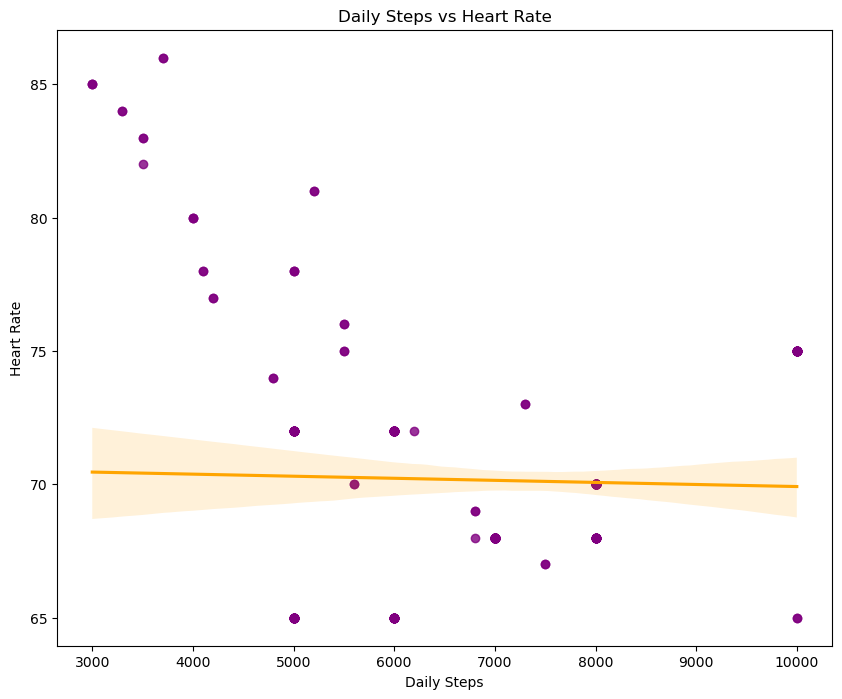

In [26]:
# Q: What is the relationship between daily steps and heart rate?
plt.figure(figsize=(10, 8))
sns.regplot(data=df1, x="Daily Steps", y="Heart Rate", scatter_kws={"color": "purple"}, line_kws={"color": "orange"})
plt.title("Daily Steps vs Heart Rate")
plt.xlabel("Daily Steps")
plt.ylabel("Heart Rate")
plt.show()

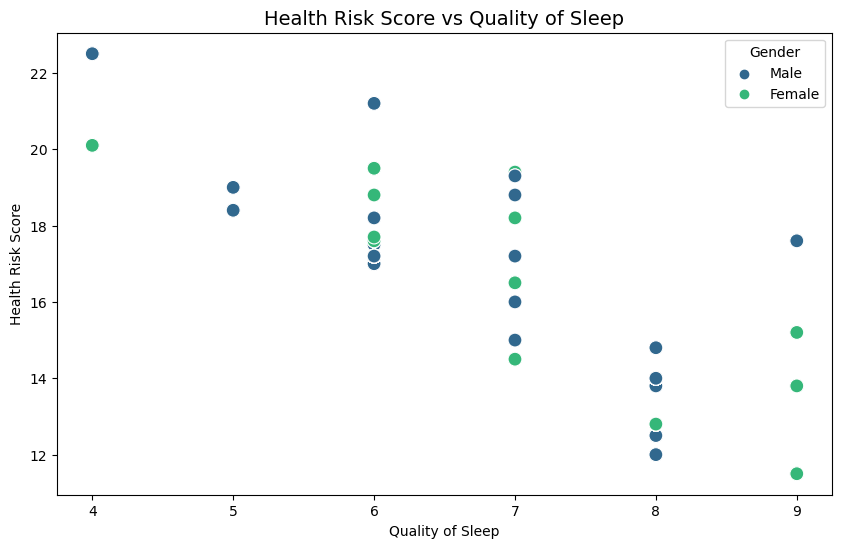

In [27]:
# Q: How does the Health Risk Score vary with Sleep Quality?
bmi_mapping = {'Normal': 1, 'Overweight': 2, 'Obese': 3}
df1['BMI Score'] = df1['BMI Category'].map(bmi_mapping)
# Calculate Health Risk Score (Health Risk Score=(BMI Score×2)+Stress Level+Heart Rate/10​)
df1['Health Risk Score'] = (df1['BMI Score'] * 2) + df1['Stress Level'] + (df1['Heart Rate'] / 10)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Quality of Sleep', y='Health Risk Score', hue='Gender', palette='viridis', s=100)
plt.title('Health Risk Score vs Quality of Sleep', fontsize=14)
plt.xlabel('Quality of Sleep')
plt.ylabel('Health Risk Score')
plt.legend(title='Gender')
plt.show()

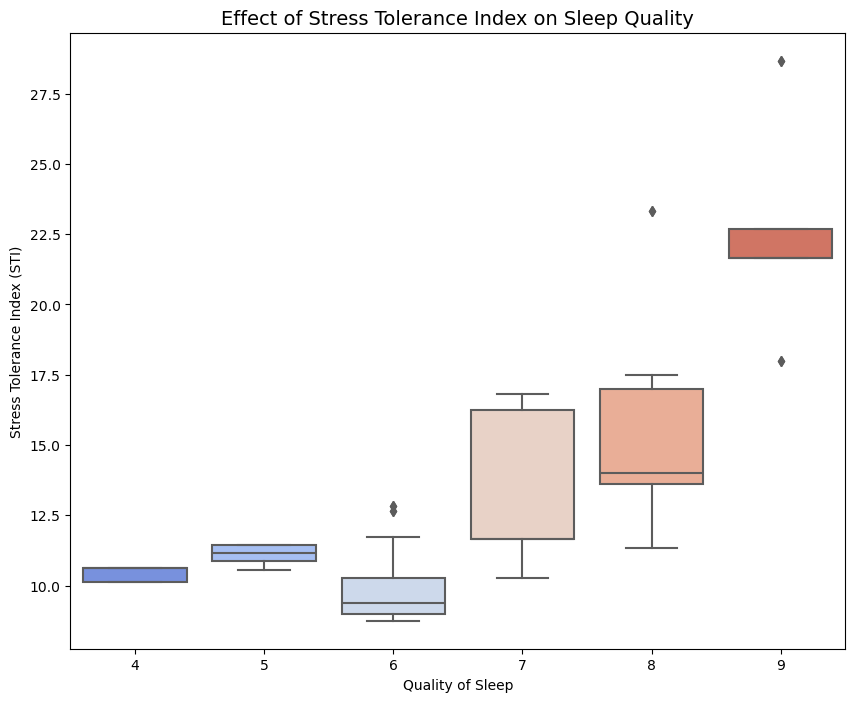

In [28]:
# Q: How does the Stress Tolerance Index (STI), calculated as the ratio of Heart Rate to Stress Level, impact the Quality of Sleep?
# Calculate Stress Tolerance Index
df1['STI'] = df1['Heart Rate'] / df1['Stress Level']
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1, x='Quality of Sleep', y='STI', palette='coolwarm')
plt.title('Effect of Stress Tolerance Index on Sleep Quality', fontsize=14)
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Tolerance Index (STI)')
plt.show()

In [29]:
#Q: What are the common patterns of sleep disorders in different age groups?
#prevalence of sleep disorders across age groups
age_bins = pd.cut(df1['Age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])
df['Age Group'] = age_bins
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Sleep Disorder', data=df1)
plt.title('Prevalence of Sleep Disorders Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


NameError: name 'df' is not defined

In [ ]:
#Q: How does BMI relate to sleep disorders?
# Calculate BMI category vs Sleep disorder occurrence 
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df1)
plt.title('BMI Category vs Sleep Disorder Occurrence')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


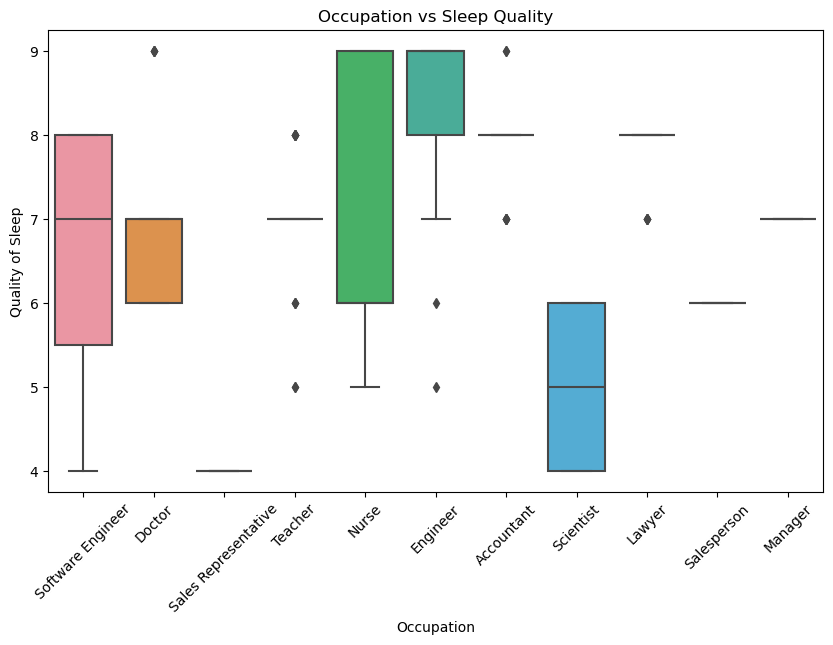

In [30]:
#Q: Does occcupation influence sleep quality?
#Occupation vs Sleep Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df1)
plt.title('Occupation vs Sleep Quality')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.show()

# Step 4: Insights & Conclusions

- **Physical Activity, Sleep Quality, and Health:**
> A key finding is the strong connection between physical activity and sleep quality. Individuals who engage in more physical activity, particularly those who exercise for longer durations (up to 90 minutes/day), tend to experience better sleep quality. This is reinforced by the observation that people with sleep disorders, especially insomnia, show lower levels of physical activity. The relationship between stress and sleep is also crucial—those with lower stress levels tend to have longer sleep durations (8-8.5 hours) and better quality sleep.

- **Demographic Factors and Sleep Patterns:**
> Gender and age both significantly influence sleep quality and related health metrics. While females are generally more prone to sleep disorders, males suffer more from insomnia. Interestingly, middle-aged individuals (31-40 and 51-60 years) report the highest sleep quality and longest sleep durations, which suggests that certain age groups may have better sleep hygiene or stress management compared to younger or older populations. Additionally, BMI is a critical factor; individuals in the obese category not only experience poorer sleep quality but also engage in less physical activity, highlighting the importance of weight management in maintaining healthy sleep patterns.

- **Health Metrics and Sleep Quality:**
>The data also shows a correlation between sleep quality and various health metrics, such as blood pressure and heart rate. People with better sleep quality tend to have higher systolic blood pressure and moderate heart rates, while those with lower sleep quality exhibit more extreme values. Moreover, higher sleep quality is linked to a lower health risk score, suggesting that improving sleep can have a broader positive impact on overall health. This is further supported by the fact that individuals with higher sleep quality also tend to have a higher Stress Tolerance Index (STI), indicating that better sleep may contribute to better stress management.

- **Occupation and Stress:**
> Occupational factors also play a role in sleep and health. For example, sales representatives report the highest stress levels, which may negatively affect their sleep quality.

### The Research questions has been answered, we now process the dataframe for machine learning algorithm

Another important observation is the Blood Pressure column, which is in the format XX/XX, causing it to be read as a string type.

Additionally, we noticed that there are some important categorical columns that need to be processed.


In [31]:
df1.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,BMI Score,Health Risk Score,STI
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,353.000000,353.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733,1.475921,15.358357,14.466880
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611,0.554028,2.583799,4.629797
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000,1.000000,11.500000,8.750000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000,1.000000,13.800000,10.285714
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000,1.000000,14.500000,13.600000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000,2.000000,17.600000,17.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000,3.000000,22.500000,28.666667


In [32]:
df1 = df1.drop(columns=['Person ID'])

In [33]:
#df1 = df1.drop(columns=['Blood Pressure', 'Occupation', 'Person ID'])


In [34]:
df1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Age Group,BMI Score,Health Risk Score,STI
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,18-30,2.0,17.7,12.833333
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,18-30,1.0,17.5,9.375000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,18-30,1.0,17.5,9.375000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,18-30,3.0,22.5,10.625000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,18-30,3.0,22.5,10.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,51-60,2.0,13.8,22.666667
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,51-60,2.0,13.8,22.666667
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,51-60,2.0,13.8,22.666667
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,51-60,2.0,13.8,22.666667


In [35]:
df1['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [36]:
df1['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

# Feature Engineering 

In [37]:
# Define a mapping for a binary classification problem
mapping_binary = {'No Disorder': 0, 'Insomnia': 1, 'Sleep Apnea': 1}

# Create a new column with binary values
df1['Sleep Disorder_cod'] = df1['Sleep Disorder'].map(mapping_binary)

# View the class distribution in the new column
print(df1[['Sleep Disorder_cod']].value_counts())

Sleep Disorder_cod
0                     219
1                     155
Name: count, dtype: int64


In [38]:
# Ordinal Encoding
# Define a specific order for weight differences
orden_BMI = ['Normal Weight', 'Normal', 'Overweight', 'Obese']

# Create a mapping from the defined order
mapping = {ocup: idx for idx, ocup in enumerate(orden_BMI)}

df1['BMI Category_cod'] = df1['BMI Category'].map(mapping)
print(df1[['BMI Category', 'BMI Category_cod']].value_counts())

BMI Category   BMI Category_cod
Normal         1                   195
Overweight     2                   148
Normal Weight  0                    21
Obese          3                    10
Name: count, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [40]:
# Performing Label Encoding for the Gender column
le = LabelEncoder()
df1['Gender_cod'] = le.fit_transform(df1['Gender'])
df1['Occupation_cod'] = le.fit_transform(df1['Occupation'])

print('\n', df1[['Gender', 'Gender_cod']].value_counts())
print('\n', df1[['Occupation', 'Occupation_cod']].value_counts())


 Gender  Gender_cod
Male    1             189
Female  0             185
Name: count, dtype: int64

 Occupation            Occupation_cod
Nurse                 5                 73
Doctor                1                 71
Engineer              2                 63
Lawyer                3                 47
Teacher               10                40
Accountant            0                 37
Salesperson           7                 32
Scientist             8                  4
Software Engineer     9                  4
Sales Representative  6                  2
Manager               4                  1
Name: count, dtype: int64


In [41]:
df1.drop(columns=['Age','Gender','Occupation','BMI Category','Sleep Disorder', 'Blood Pressure', 'Age Group'],inplace=True)
df1.head()

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,BMI Score,Health Risk Score,STI,Sleep Disorder_cod,BMI Category_cod,Gender_cod,Occupation_cod
0,6.1,6,42,6,77,4200,126,83,2.0,17.7,12.833333,0,2,1,9
1,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,0,1,1,1
2,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,0,1,1,1
3,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,1,3,1,6
4,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,1,3,1,6


In [43]:
#df1.drop(columns=['Blood Pressure', 'Age'])

Blood pressure = systolic/diastolic

* **Systolic Pressure**:

  - The upper value in the blood pressure measurement.
  - It occurs when the heart beats and pumps blood into the arteries.
  - Represents the maximum force that blood exerts against artery walls while the heart is beating.
  - Normally ranges from 90 to 120 mmHg.

* **Diastolic Pressure**:

  - The lower value in the blood pressure measurement.
  - It occurs when the heart is at rest, between beats, allowing the chambers to fill with blood.
  - Represents the minimum force that blood exerts against artery walls between beats.
  - Normally ranges from 60 to 80 mmHg.


In [45]:
#Make a copy of the  cleaned dataframe (df1) to df 
df = df1
df.head()

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,BMI Score,Health Risk Score,STI,Sleep Disorder_cod,BMI Category_cod,Gender_cod,Occupation_cod
0,6.1,6,42,6,77,4200,126,83,2.0,17.7,12.833333,0,2,1,9
1,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,0,1,1,1
2,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,0,1,1,1
3,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,1,3,1,6
4,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,1,3,1,6


In [46]:
#df.drop(columns=['Age Group', 'Blood Pressure'],inplace=True)


In [160]:
df.columns

Index(['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP',
       'Diastolic BP', 'BMI Score', 'Health Risk Score', 'STI',
       'Sleep Disorder_cod', 'BMI Category_cod', 'Gender_cod',
       'Occupation_cod'],
      dtype='object')

In [48]:
# df.drop(columns=['Age Group'])
# df.head()

In [49]:
df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,BMI Score,Health Risk Score,STI,Sleep Disorder_cod,BMI Category_cod,Gender_cod,Occupation_cod
0,6.1,6,42,6,77,4200,126,83,2.0,17.7,12.833333,0,2,1,9
1,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,0,1,1,1
2,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,0,1,1,1
3,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,1,3,1,6
4,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,1,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,8.1,9,75,3,68,7000,140,95,2.0,13.8,22.666667,1,2,0,5
370,8.0,9,75,3,68,7000,140,95,2.0,13.8,22.666667,1,2,0,5
371,8.1,9,75,3,68,7000,140,95,2.0,13.8,22.666667,1,2,0,5
372,8.1,9,75,3,68,7000,140,95,2.0,13.8,22.666667,1,2,0,5


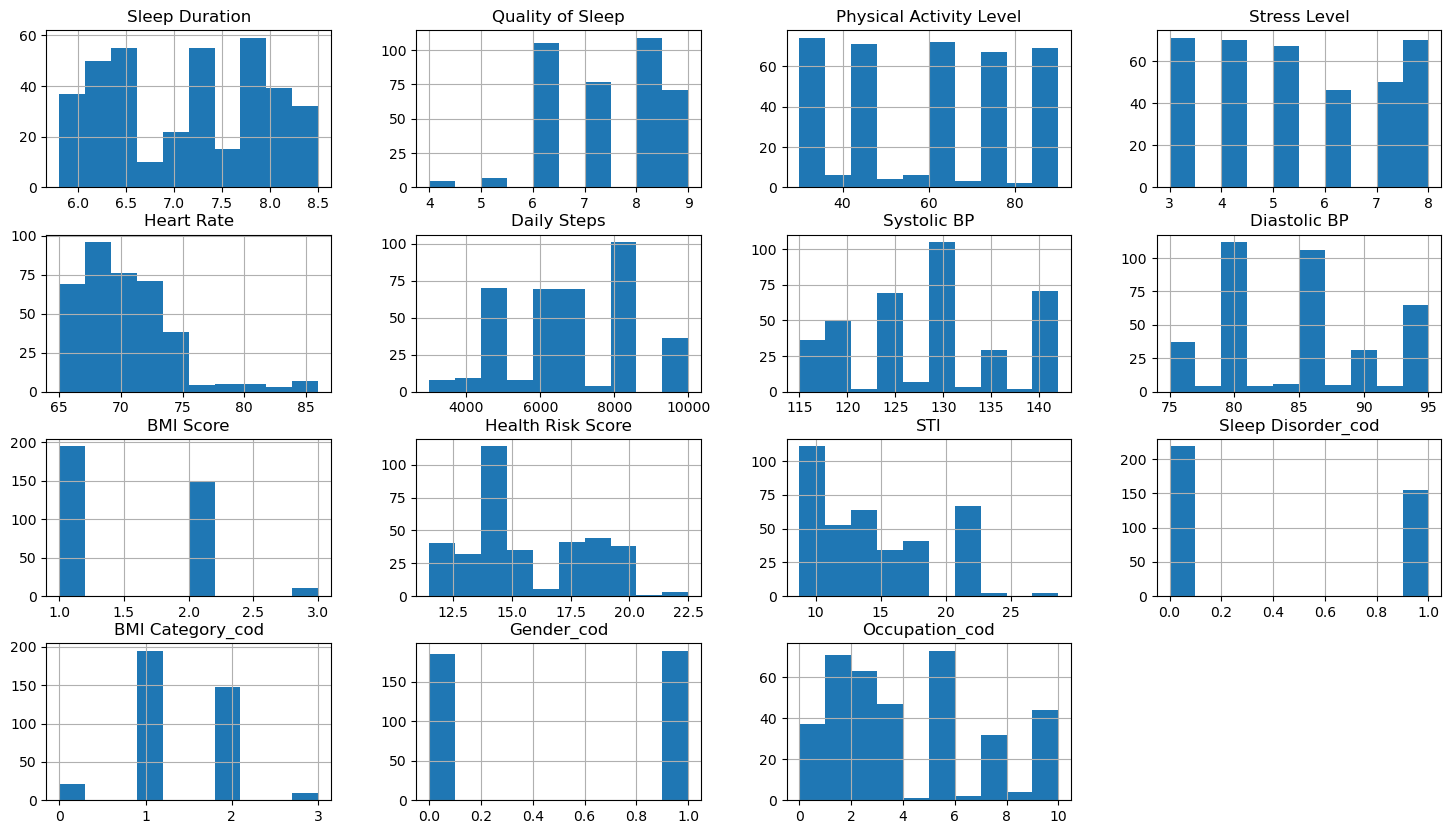

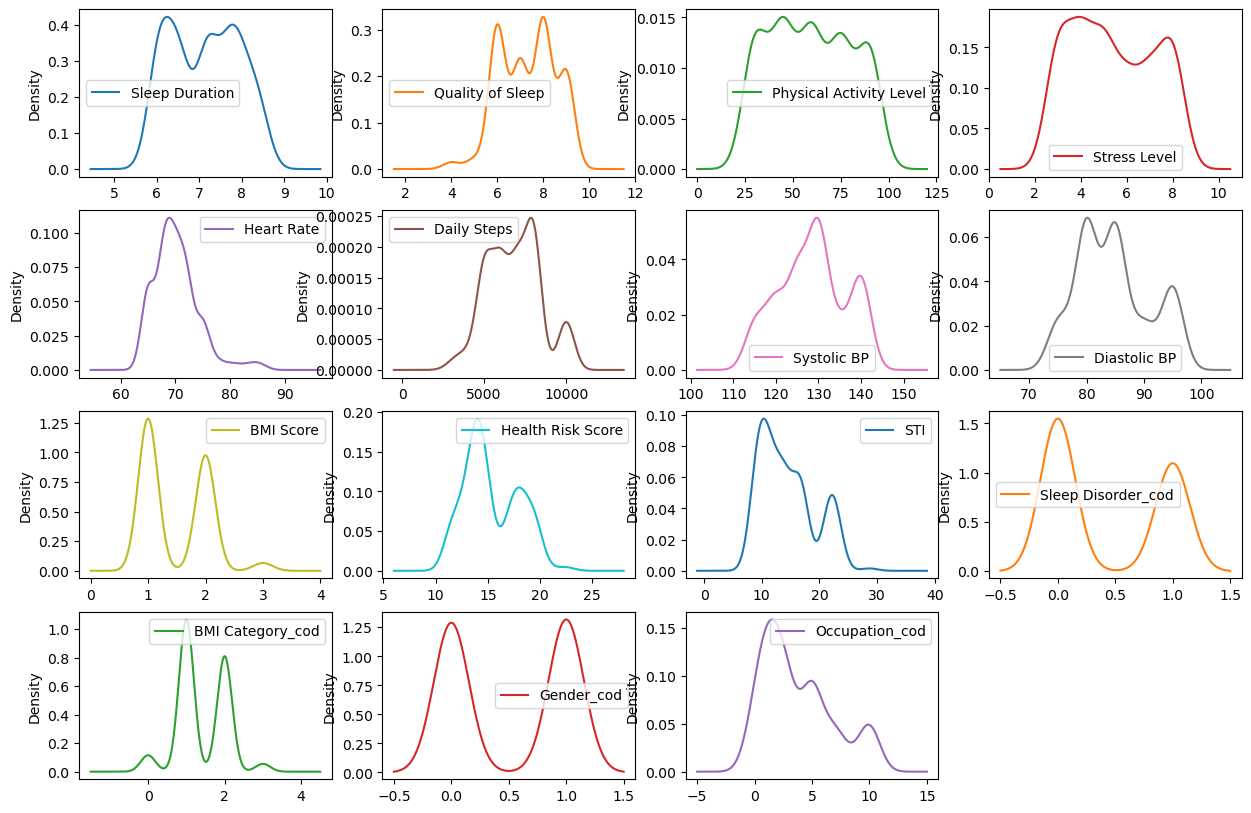

In [50]:
df_numericas = df.select_dtypes(include=[np.number])

df_numericas.hist(figsize=(18, 10))
plt.show()

df_numericas.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15, 10))
plt.show()

### Correlation Analysis

In [51]:
df.corr(numeric_only=True)

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,BMI Score,Health Risk Score,STI,Sleep Disorder_cod,BMI Category_cod,Gender_cod,Occupation_cod
Sleep Duration,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570,-0.349992,-0.789402,0.778601,-0.338622,-0.323953,-0.121579,-0.325775
Quality of Sleep,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151,-0.339021,-0.874748,0.861508,-0.310984,-0.288405,-0.291366,-0.278071
Physical Activity Level,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651,0.056927,0.054219,0.007969,0.069787,0.039991,0.001454,-0.103660
Stress Level,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811,0.158575,0.866851,-0.944473,0.181685,0.145691,0.396018,0.021123
Heart Rate,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092,0.511588,0.840221,-0.511249,0.330254,0.381413,0.217105,0.043928
Daily Steps,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986,-0.151959,0.103219,-0.235018,-0.026575,-0.120431,-0.014509,-0.105877
Systolic BP,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885,0.739042,0.417743,0.030380,0.692480,0.717672,-0.210527,0.518561
Diastolic BP,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000,0.735363,0.408047,0.033611,0.705025,0.702136,-0.268378,0.521835
BMI Score,-0.349992,-0.339021,0.056927,0.158575,0.511588,-0.151959,0.739042,0.735363,1.000000,0.619973,-0.013692,0.798320,1.000000,-0.272721,0.639456
Health Risk Score,-0.789402,-0.874748,0.054219,0.866851,0.840221,0.103219,0.417743,0.408047,0.619973,1.000000,-0.739610,0.505947,0.619973,0.209105,0.284591


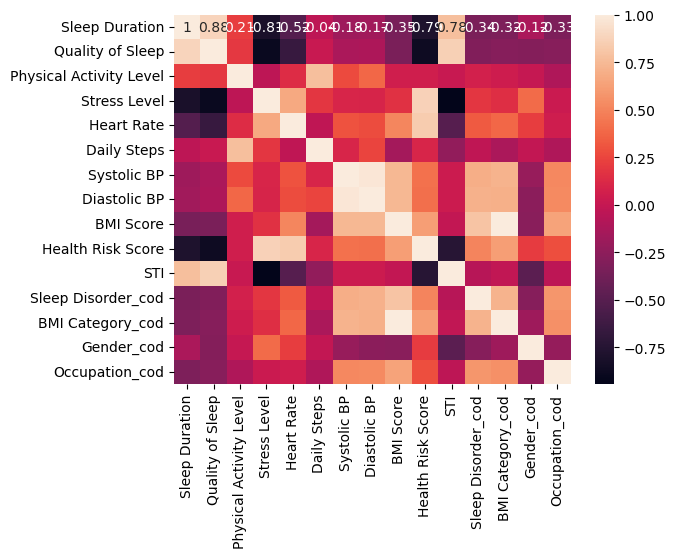

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

## MODELLING 

In [66]:
X = df.drop(columns=['Sleep Disorder_cod'])
y = df['Sleep Disorder_cod']

In [67]:
print(X.head())

   Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  \
0             6.1                 6                       42             6   
1             6.2                 6                       60             8   
2             6.2                 6                       60             8   
3             5.9                 4                       30             8   
4             5.9                 4                       30             8   

   Heart Rate  Daily Steps  Systolic BP  Diastolic BP  BMI Score  \
0          77         4200          126            83        2.0   
1          75        10000          125            80        1.0   
2          75        10000          125            80        1.0   
3          85         3000          140            90        3.0   
4          85         3000          140            90        3.0   

   Health Risk Score        STI  BMI Category_cod  Gender_cod  Occupation_cod  
0               17.7  12.833333           

In [68]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# # Fit the encoder on the combined data to avoid unseen labels
# all_categories = pd.concat([X_train['Age Group'], X_test['Age Group']]).unique()
# le.fit(all_categories)

# # Transform both training and testing sets
# X_train['Age Group'] = le.transform(X_train['Age Group'])
# X_test['Age Group'] = le.transform(X_test['Age Group'])


In [69]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X_train['Age Group'] = le.fit_transform(X_train['Age Group'])
# X_test['Age Group'] = le.transform(X_test['Age Group'])


In [78]:
X

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,BMI Score,Health Risk Score,STI,BMI Category_cod,Gender_cod,Occupation_cod
0,6.1,6,42,6,77,4200,126,83,2.0,17.7,12.833333,2,1,9
1,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,1,1,1
2,6.2,6,60,8,75,10000,125,80,1.0,17.5,9.375000,1,1,1
3,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,3,1,6
4,5.9,4,30,8,85,3000,140,90,3.0,22.5,10.625000,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,8.1,9,75,3,68,7000,140,95,2.0,13.8,22.666667,2,0,5
370,8.0,9,75,3,68,7000,140,95,2.0,13.8,22.666667,2,0,5
371,8.1,9,75,3,68,7000,140,95,2.0,13.8,22.666667,2,0,5
372,8.1,9,75,3,68,7000,140,95,2.0,13.8,22.666667,2,0,5


In [86]:
print(np.isnan(X_train).sum())  

Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
Heart Rate                  0
Daily Steps                 0
Systolic BP                 0
Diastolic BP                0
BMI Score                  19
Health Risk Score          19
STI                         0
BMI Category_cod            0
Gender_cod                  0
Occupation_cod              0
dtype: int64


In [101]:
print(y.head())

0    0
1    0
2    0
3    1
4    1
Name: Sleep Disorder_cod, dtype: int64


In [102]:
y

0      0
1      0
2      0
3      1
4      1
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder_cod, Length: 374, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [104]:
X_test

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,BMI Score,Health Risk Score,STI,BMI Category_cod,Gender_cod,Occupation_cod
329,8.5,9,30,3,65,5000,125,80,1.0,11.5,21.666667,1,0,2
33,6.1,6,30,8,72,5000,125,80,1.0,17.2,9.000000,1,1,1
15,6.0,6,30,8,70,8000,120,80,1.0,17.0,8.750000,1,1,1
325,8.5,9,30,3,65,5000,125,80,1.0,11.5,21.666667,1,0,2
57,6.0,6,30,8,72,5000,125,80,1.0,17.2,9.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,7.2,8,60,4,68,7000,115,75,1.0,12.8,17.000000,1,0,0
195,6.5,6,45,7,72,6000,130,85,2.0,18.2,10.285714,2,1,7
312,8.4,9,30,3,65,5000,125,80,1.0,11.5,21.666667,1,0,2
292,6.1,6,90,8,75,10000,140,95,2.0,19.5,9.375000,2,0,5


In [105]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(239, 14) (75, 14)
(239,) (75,)


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [108]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [109]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
   "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Logistic Regression Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.91      0.94      0.92        32

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

--------------------------------------------------
Decision Tree Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

--------------------------------------------------
Random Forest Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94   

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [114]:
# Cross-validation evaluation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    
# Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Train the best Random Forest model and evaluate
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Logistic Regression Cross-Validation Accuracy: 0.9079 ± 0.0314
Decision Tree Cross-Validation Accuracy: 0.9077 ± 0.0323
Random Forest Cross-Validation Accuracy: 0.9035 ± 0.0348
SVM Cross-Validation Accuracy: 0.9206 ± 0.0241
KNN Cross-Validation Accuracy: 0.8910 ± 0.0410
Gradient Boosting Cross-Validation Accuracy: 0.9077 ± 0.0323
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [116]:
print(grid_search.best_estimator_)


RandomForestClassifier(min_samples_split=10, n_estimators=200)


In [117]:
best_rf_model = RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [119]:
print(best_rf_model)


RandomForestClassifier(min_samples_split=10, n_estimators=200)


In [123]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


BMI Category_cod: 0.2224
BMI Score: 0.1944
Occupation_cod: 0.1258
Systolic BP: 0.1152
Diastolic BP: 0.1050
Health Risk Score: 0.0744
Sleep Duration: 0.0631
STI: 0.0284
Heart Rate: 0.0180
Stress Level: 0.0167
Daily Steps: 0.0146
Quality of Sleep: 0.0094
Physical Activity Level: 0.0074
Gender_cod: 0.0051


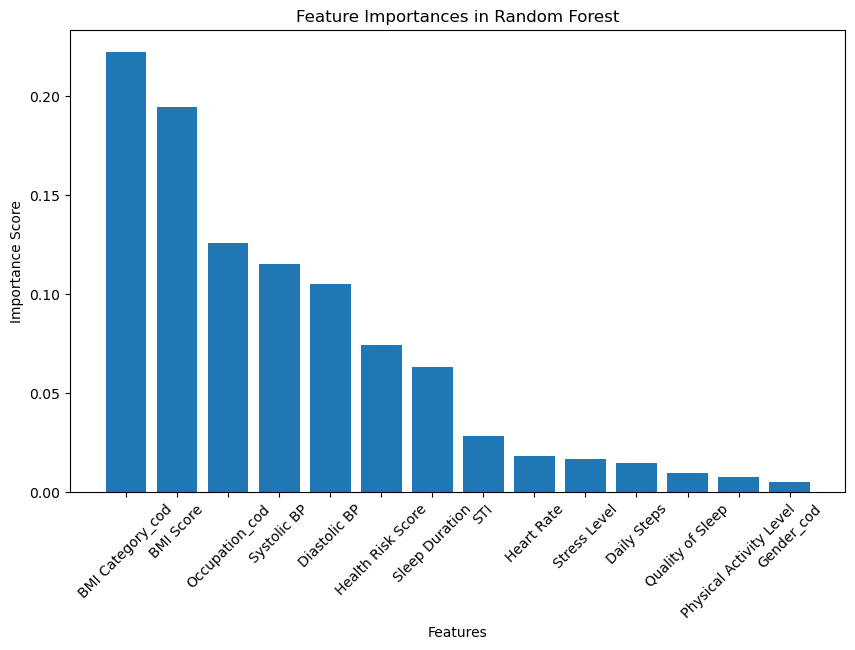

In [127]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

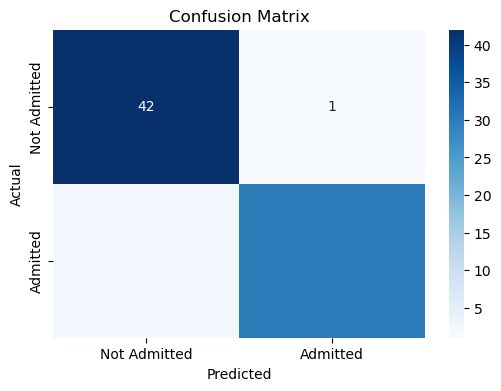

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



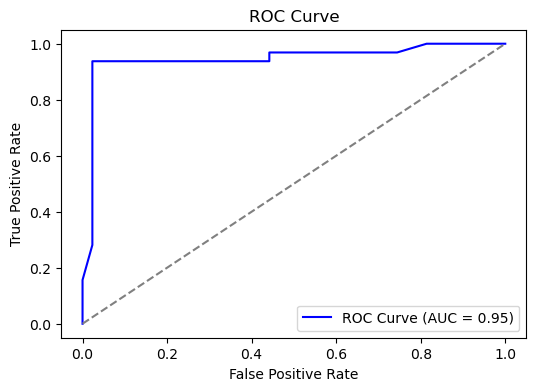

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on test set
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [129]:
import pickle

In [143]:

# Save the trained model
filename = "sleep_disorder_prediction.pkl"
with open(filename, "wb") as file:
    pickle.dump(best_rf_model, file)

print("Model saved successfully!")


Model saved successfully!


In [155]:
# Select a specific row from X_test
row_index = 40  # Ensure this index exists
input_data = X_test[row_index].reshape(1, -1)  # Reshape for prediction

# Convert the row to a list and print it
row_values = input_data.flatten().tolist()  # Convert NumPy row to list
print("Input Values:", row_values)


Input Values: [-0.826953189559124, -1.1705104827748753, -0.7220739090186659, 0.9576303941467929, 0.5546158888767333, -0.5660171774977069, 0.17543712035913425, 0.04276983789981167, 1.049353939025578, 1.2340012517295098, -0.9326408800946895, 1.0102675232547857, 1.0383934078976127, 1.01399123853624]


In [159]:
# Make prediction
prediction = best_rf_model.predict(input_data)

# Check the prediction and print the appropriate message
if prediction[0] == 0:
    print("Patient has no sleep disorder.")
elif prediction[0] == 1 or prediction[0] == 2:
    print("Patient has a sleep disorder.")


Patient has a sleep disorder.
